In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
net_dataset = pd.read_csv("data/netflix_titles.csv")
net_dataset


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,South Africa,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,NaN,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,India,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8791,s8803,Movie,Zodiac,David Fincher,United States,11/20/2019,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8792,s8804,TV Show,Zombie Dumb,NaN,NaN,7/1/2019,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8793,s8805,Movie,Zombieland,Ruben Fleischer,United States,11/1/2019,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8794,s8806,Movie,Zoom,Peter Hewitt,United States,1/11/2020,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
net_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8796 non-null   object
 1   type          8796 non-null   object
 2   title         8796 non-null   object
 3   director      6166 non-null   object
 4   country       7966 non-null   object
 5   date_added    8786 non-null   object
 6   release_year  8796 non-null   int64 
 7   rating        8792 non-null   object
 8   duration      8796 non-null   object
 9   listed_in     8796 non-null   object
 10  description   8796 non-null   object
dtypes: int64(1), object(10)
memory usage: 756.0+ KB


In [6]:
net_dataset.shape

(8796, 11)

In [9]:
net_dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [4]:
# cleaning the dataset to make sure no null values remain 
net_dataset['director'] = net_dataset['director'].fillna('Unknown')
net_dataset['country'] = net_dataset['country'].fillna('Unknown')
net_dataset['date_added'] = net_dataset['date_added'].fillna('Unknown')
net_dataset['duration'] = net_dataset['duration'].fillna('Unknown')
net_dataset['rating'] = net_dataset['rating'].fillna('NR')

In [5]:
# Data types (To understand the structure of your dataset)
print(net_dataset.dtypes)


show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [6]:
# convert date_added from object to int
net_dataset['date_added'] = pd.to_datetime(net_dataset['date_added'], errors='coerce')
net_dataset['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8791   2019-11-20
8792   2019-07-01
8793   2019-11-01
8794   2020-01-11
8795   2019-03-02
Name: date_added, Length: 8796, dtype: datetime64[ns]

In [13]:

# To know the split between Movies and TV Shows.
print(net_dataset['type'].value_counts())  # Movies vs TV Shows


type
Movie      6124
TV Show    2672
Name: count, dtype: int64


In [14]:
print(net_dataset['rating'].value_counts())  # e.g., TV-MA, PG, etc.To understand content ratings

rating
TV-MA       3205
TV-14       2156
TV-PG        863
R            798
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            83
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


In [ ]:
# Phase 2 EDA (Exploratory Data Analysis)

In [15]:
# Feature Extraction
def extract_hours(txt):
    for i in txt.split():
        if i.isdigit():
            return int(i)

txt = '99 mins'
extract_hours(txt)

99

In [16]:
duration_int = net_dataset['duration'].apply(extract_hours)
max_hour = duration_int.max()

# Proper Series comparison (element-wise)
longest_movie = net_dataset[duration_int == max_hour]
# Question 1 - Longest Duration movie
longest_movie


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [7]:
# vectorized approach of getting the longest movie
# Step 1: Filter only movies
movies_df = net_dataset[net_dataset['type'] == 'Movie'].copy()

# Step 2: Extract number from 'duration' using regex
movies_df['duration_mins'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

# Step 3: Find the movie with the longest duration
longest_movie = movies_df[movies_df['duration_mins'] == movies_df['duration_mins'].max()]
longest_movie


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,duration_mins
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312.0


In [8]:
# shortest movie 
movie_list = net_dataset[net_dataset['type'] == 'Movie'].copy()
movie_list['duration_mins'] = movie_list['duration'].str.extract(r'(\d+)').astype(float)
movie_list[movie_list['duration_mins'] == movie_list['duration_mins'].min()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,duration_mins
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",United States,2019-06-04,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3.0


In [19]:
# Longest TV Show
tv_list = net_dataset[net_dataset['type'] == 'TV Show'].copy()
tv_list['show_duration'] = tv_list['duration'].str.extract(r'(\d)').astype(float)
tv_list[tv_list['show_duration'] == tv_list['show_duration'].max()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,show_duration
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9.0
67,s68,TV Show,Saved by the Bell,Unknown,United States,2021-09-15,1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za...",9.0
1480,s1481,TV Show,Still Game,Unknown,United Kingdom,2020-12-30,2018,TV-14,9 Seasons,"British TV Shows, Classic & Cult TV, Internati...",Scottish pensioners Jack and Victor make the m...,9.0
1701,s1702,TV Show,American Horror Story,Unknown,United States,2020-11-13,2019,TV-MA,9 Seasons,"TV Horror, TV Mysteries, TV Thrillers",This twisted Emmy-winning drama plays upon the...,9.0
1998,s1999,TV Show,Call the Midwife,Philippa Lowthorpe,United Kingdom,2020-09-15,2020,TV-MA,9 Seasons,"British TV Shows, International TV Shows, TV D...",This period drama set in impoverished East Lon...,9.0
3541,s3542,TV Show,Naruto,Hayato Date,Japan,2019-09-01,2006,TV-14,9 Seasons,"Anime Series, International TV Shows","Guided by the spirit demon within him, orphane...",9.0
5799,s5804,TV Show,Forensic Files,Unknown,United States,2016-09-01,2011,TV-MA,9 Seasons,"Crime TV Shows, Docuseries, Science & Nature TV",Detectives and crime lab technicians use the l...,9.0
6496,s6505,TV Show,Club Friday The Series 6,Unknown,Unknown,2019-03-09,2015,TV-MA,9 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Based on a Thai radio show that gives love adv...,9.0
8431,s8443,TV Show,The Office (U.S.),Unknown,United States,NaT,2012,TV-14,9 Seasons,TV Comedies,This hit comedy chronicles the foibles of disg...,9.0


In [9]:
# Shortest TV Show
tv_list = net_dataset[net_dataset['type'] == 'TV Show'].copy()
tv_list['show_duration'] = tv_list['duration'].str.extract(r'(\d)').astype(float)
tv_list[tv_list['show_duration'] == tv_list['show_duration'].min()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,show_duration
2,s3,TV Show,Ganglands,Julien Leclercq,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",1.0
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Unknown,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8764,s8776,TV Show,Yeh Meri Family,Unknown,India,2018-08-31,2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal...",1.0
8769,s8781,TV Show,Yo-Kai Watch,Unknown,United States,2016-04-01,2015,TV-Y7,1 Season,"Anime Series, Kids' TV",Nate frees a mythical being trapped in a magic...,1.0
8772,s8784,TV Show,Yoko,Unknown,Unknown,2018-06-23,2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",1.0
8774,s8786,TV Show,YOM,Unknown,Unknown,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",1.0


<Axes: ylabel='rating'>

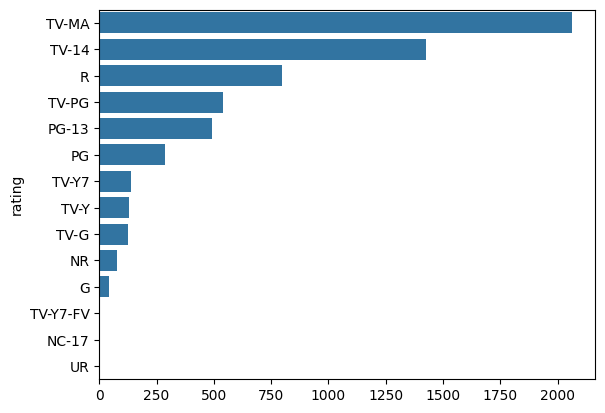

In [20]:
# Bar chart of movies (rating wise)
movie_rating_wise = net_dataset[net_dataset['type'] == 'Movie']['rating'].value_counts()
sns.barplot( y=movie_rating_wise.index, x=movie_rating_wise.values)

<Axes: ylabel='rating'>

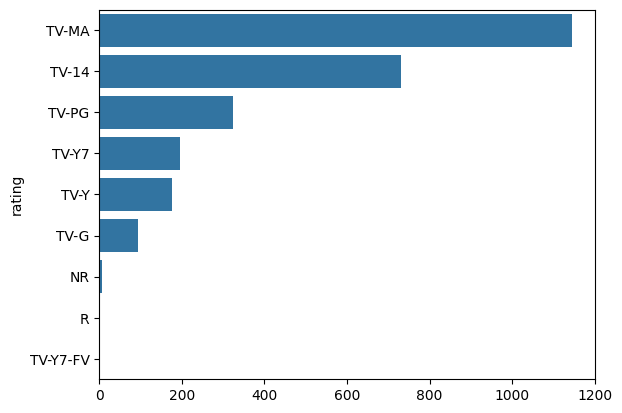

In [116]:
# Bar chart of TV Show (rating wise)
movie_rating_wise = net_dataset[net_dataset['type'] == 'TV Show']['rating'].value_counts()
sns.barplot( y=movie_rating_wise.index, x=movie_rating_wise.values)

In [ ]:
# Bar chart of movies (rating wise)
# movie_country_wise = net_dataset[net_dataset['type'] == 'Movie']['country'].value_counts()
# movie_country_wise
#  this is a wrong approach

country
United States                      2055
India                               892
Unknown                             440
United Kingdom                      206
Canada                              122
                                   ... 
Italy, France, Switzerland            1
Canada, France, United States         1
Switzerland, United States            1
Thailand, Canada, United States       1
Germany, Canada, United States        1
Name: count, Length: 652, dtype: int64

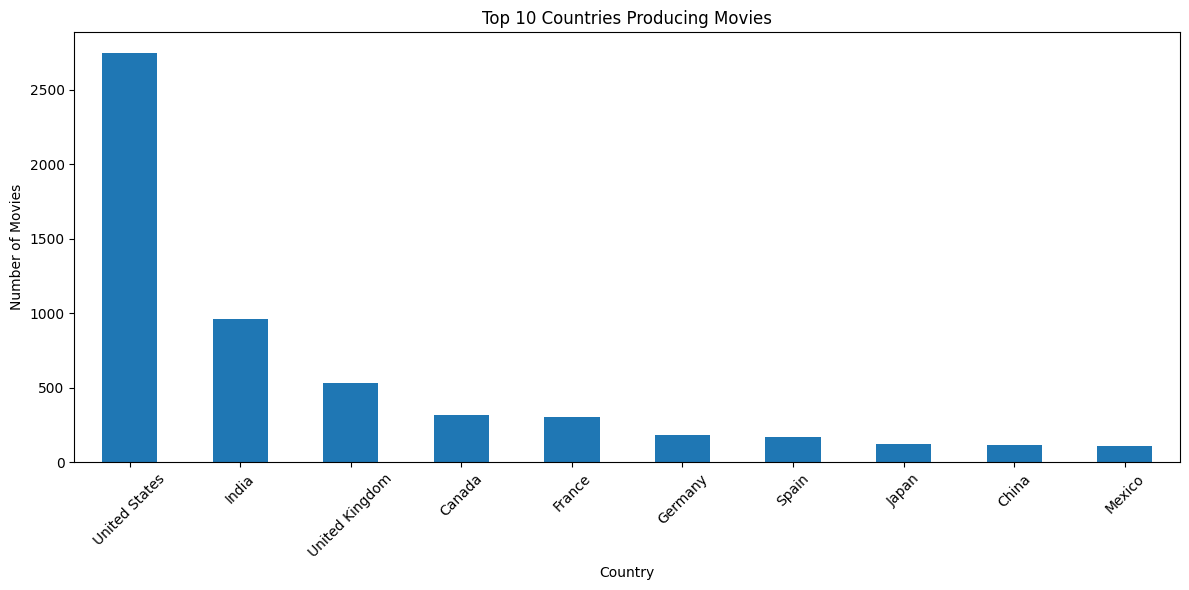

In [10]:
#  bar chart for movie (country wise)
movie_con_wise = net_dataset[net_dataset['type'] == 'Movie'].copy()
movie_con_wise['country'] = movie_con_wise['country'].str.split(',')
movie = movie_con_wise.explode('country')
movie['country'] = movie['country'].str.strip()

# Drop rows where country is 'Unknown'
movie = movie[movie['country'] != 'Unknown']

movie_country_wise = movie['country'].value_counts()

movie_country_wise

plt.figure(figsize=(12,6))
movie_country_wise.head(10).plot(kind='bar')
plt.title('Top 10 Countries Producing Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

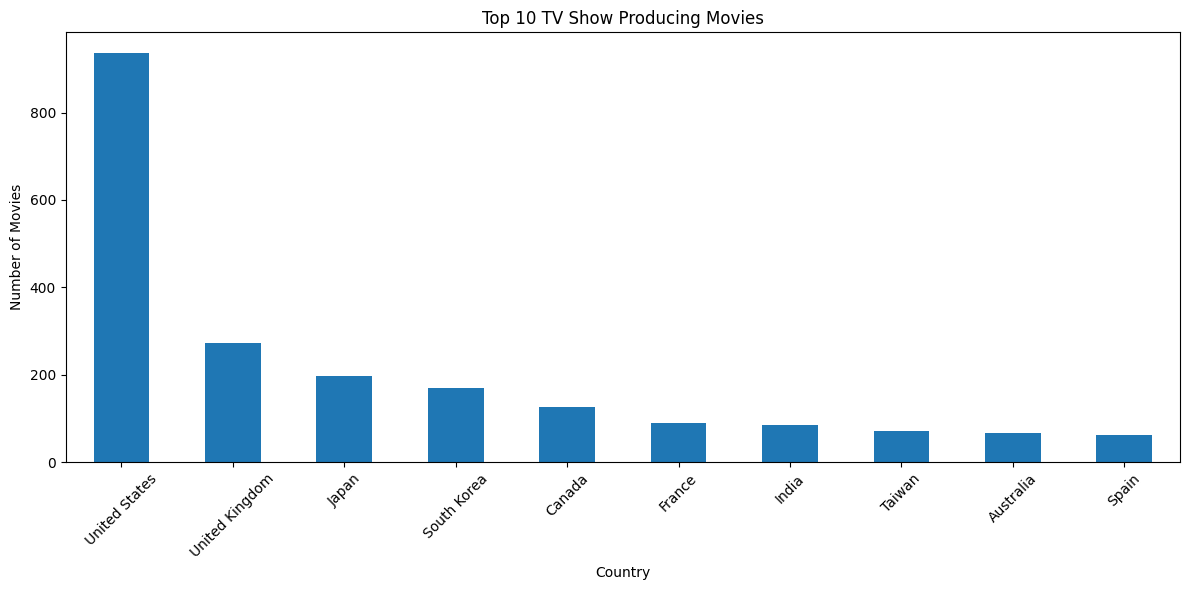

In [170]:
# Country wise TV Show
tv_show = net_dataset[net_dataset['type'] == 'TV Show'].copy()
tv_show['country'] = tv_show['country'].str.split(',')
tv_show = tv_show.explode('country')
tv_show['country'] = tv_show['country'].str.strip()
tv_show = tv_show[tv_show['country'] != 'Unknown']
tv_con = tv_show['country'].value_counts()

plt.figure(figsize=(12,6))
tv_con.head(10).plot(kind='bar')
plt.title('Top 10 TV Show Producing Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='type'>

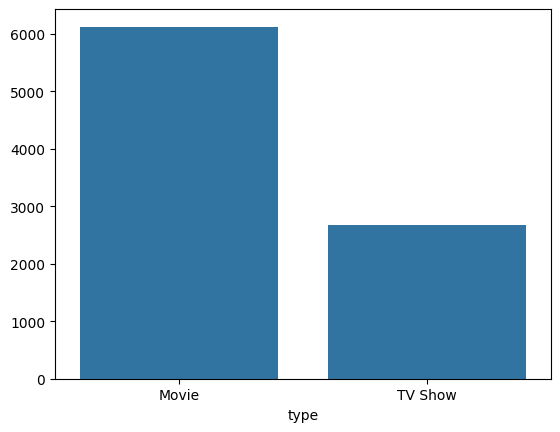

In [22]:
# graph of Moveis vs TV Shows
movie_TV = net_dataset['type'].value_counts()
sns.barplot(x=movie_TV.index,y=movie_TV.values)

In [11]:
net_dataset['combined_features'] = (net_dataset['listed_in'] + ' ' + net_dataset['description']).str.lower()
net_dataset.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,combined_features
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",documentaries as her father nears the end of h...
1,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","international tv shows, tv dramas, tv mysterie..."
2,s3,TV Show,Ganglands,Julien Leclercq,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"crime tv shows, international tv shows, tv act..."


In [24]:
net_dataset[['title', 'combined_features']].head(3)


,title,combined_features
0,Dick Johnson Is Dead,documentaries as her father nears the end of h...
1,Blood & Water,"international tv shows, tv dramas, tv mysterie..."
2,Ganglands,"crime tv shows, international tv shows, tv act..."


In [13]:
cv = CountVectorizer(stop_words='english')
count_matrix = cv.fit_transform(net_dataset['combined_features'])
dense_matrix = count_matrix.todense()
print(dense_matrix[:3, :3])

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [14]:
similarity_matrix = cosine_similarity(count_matrix)


In [28]:
# Your goal now is:

# Given a movie or TV show title as input,

# Find the index of that title in your dataset,

# Use the similarity matrix to find the most similar shows (highest similarity scores),

# Return the top N most similar titles as recommendations.

def recommendation_system(user_input):
    value = net_dataset[net_dataset['title'].str.lower() == user_input.lower()]
    try:
        if not value.empty:
            index = value.index[0]
            similarities = list(enumerate(similarity_matrix[index]))
            result = sorted(similarities,key=lambda x:x[1] ,reverse=True)[1:6]
            print('Similar Movies to Explore:')
            for i,k in result:
                print(net_dataset.iloc[i]['title'])
            # return result
        else:
            print('Enter the genre of the Flim:')
    except (ValueError,TypeError):
        return 'Invalid Entry'

txt = 'Inception'
recommendation_system(txt) 

Similar Movies to Explore:
Stargate
Skyline
Dragonheart: A New Beginning
Midnight Special
Apollo 18


In [15]:
def recommendation_system(user_input):
    value = net_dataset[net_dataset['title'].str.lower() == user_input.lower()]
    if value.empty:
        genre = input('Enter the genre of the film:').lower()
        user_matrix = cv.transform([genre])
        comparision_similarities = cosine_similarity(user_matrix, count_matrix)
        comparision_similarities = list(enumerate(comparision_similarities[0]))
        comparision_result = sorted(comparision_similarities, key=lambda x:x[1], reverse=True)[:5]
        print(f"We do not have '{user_input}' but you might like:")
        for i , k in comparision_result:
            print(net_dataset.iloc[i]['title'])
        return
    try:
        index = value.index[0]
        similarities = list(enumerate(similarity_matrix[index]))
        result = sorted(similarities,key=lambda x:x[1] ,reverse=True)[1:6]
        print('Similar Movies to Explore:')
        for i,k in result:
            print(net_dataset.iloc[i]['title'])
    except (ValueError, TypeError) as e:
        print("Error while finding recommendations:", str(e))
        
txt = input('Enter a Movie Name')
recommendation_system(txt) 

Similar Movies to Explore:
Stargate
Skyline
Dragonheart: A New Beginning
Midnight Special
Apollo 18


In [ ]:

from random import sample
from difflib import SequenceMatcher

def evaluate_top_k_hit_rate(dataset, k=5, n_samples=50):
    hits = 0
    samples = sample(dataset['title'].dropna().unique().tolist(), n_samples)
    
    for title in samples:
        match_title, recs, _ = recommendation_system(title, num_recs=k)
        if not recs:
            continue

        original_genres = set(dataset[dataset['title'] == title]['listed_in'].iloc[0].lower().split(", "))
        for rec in recs:
            rec_genres = set(dataset[dataset['title'] == rec]['listed_in'].iloc[0].lower().split(", "))
            if original_genres & rec_genres:
                hits += 1
                break

    return round(hits / n_samples * 100, 2)
